## Collatz basics

In [13]:
"""
This notebook analyses basic attributes of collatz sequences and visualises them. 
The script produces a random collatz sequence for a predefined factor k and 
a max amount of iterations. 
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from collatz import generator as gen
from collatz import commons as com


# Configuration
MAX_VALUE = 101
K_FACTOR = 3
MAX_ITERATIONS = 300
ODDS_ONLY = False

START_VALUE = rnd.randint(1, MAX_VALUE)
# START_VALUE = 19

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)

# Create a collatz sequence and analyse it
analysis_frame = gen.generate_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

next_frame = com.analyse_collatz_basic_attributes(analysis_frame["next_collatz"])
analysis_frame["next_log2"] = next_frame["log2"]
analysis_frame["n_log2_fraction"] = next_frame["log2_fraction"]
analysis_frame["fraction_diff"] = \
    analysis_frame["log2_fraction"] - analysis_frame["n_log2_fraction"]

analysis_frame["mod_k"] = analysis_frame["collatz"] % K_FACTOR 
analysis_frame["mod_4"] = analysis_frame["collatz"] % 4 

analysis_frame["bin_str"] = analysis_frame["collatz"].apply(com.to_binary)
analysis_frame["bin_len"] = analysis_frame["log2"].astype('int64') + 1

start_value = analysis_frame["collatz"][0]

# Show only odd numbers
if ODDS_ONLY:
    analysis_frame = analysis_frame[analysis_frame["odd"] == 1]

# Print data
print("Start value:", start_value, " K:", K_FACTOR, "\n")
print(analysis_frame[["collatz", "log2", "log2_fraction", 
                      "n_log2_fraction", "bin_str", "mod_4"]])

Start value: 41  K: 3 

     collatz       log2  log2_fraction  n_log2_fraction         bin_str  mod_4
0         41   5.357552       0.357552         0.954196          101001      1
1        124   6.954196       0.954196         0.954196         1111100      0
2         62   5.954196       0.954196         0.954196          111110      2
3         31   4.954196       0.954196         0.554589           11111      3
4         94   6.554589       0.554589         0.554589         1011110      2
5         47   5.554589       0.554589         0.149747          101111      3
6        142   7.149747       0.149747         0.149747        10001110      2
7         71   6.149747       0.149747         0.741467         1000111      3
8        214   7.741467       0.741467         0.741467        11010110      2
9        107   6.741467       0.741467         0.330917         1101011      3
10       322   8.330917       0.330917         0.330917       101000010      2
11       161   7.330917     

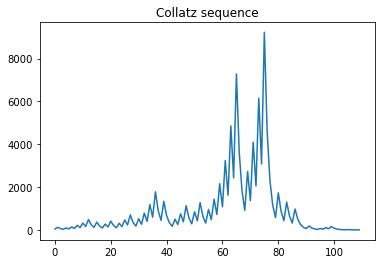

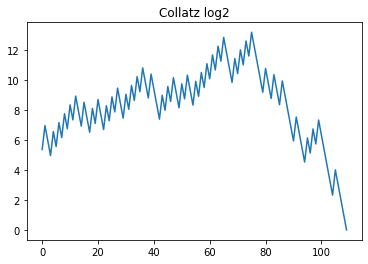

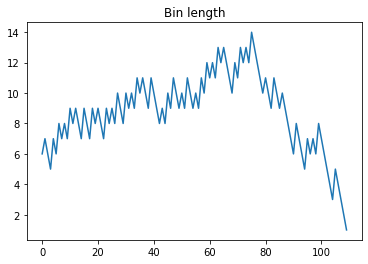

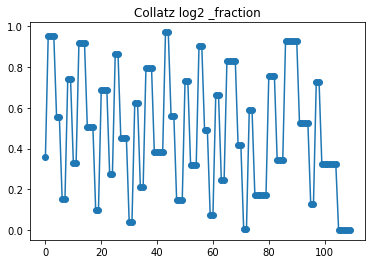

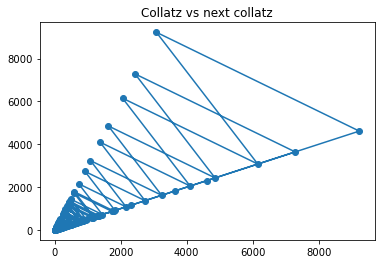

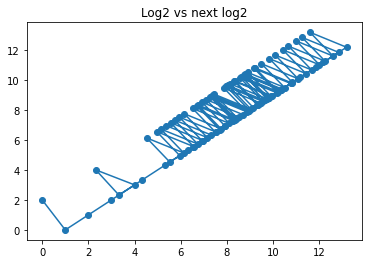

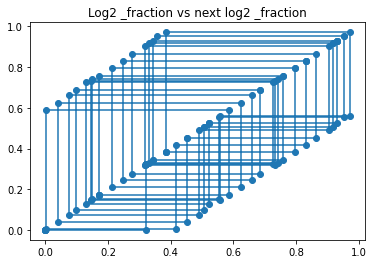

In [14]:
#Plot results
# Collatz
plt.figure()
plt.title("Collatz sequence")
plt.plot(analysis_frame["collatz"])

# log2
plt.figure()
plt.title("Collatz log2")
plt.plot(analysis_frame["log2"])

# bin length
plt.figure()
plt.title("Bin length")
plt.plot(analysis_frame["bin_len"], "-")

# log2 _fraction
plt.figure()
plt.title("Collatz log2 _fraction")
plt.plot(analysis_frame["log2_fraction"], "o-")

# collatz vs next collatz
plt.figure()
plt.title("Collatz vs next collatz")
plt.plot(analysis_frame["collatz"], analysis_frame["next_collatz"], "o-")

# log2 vs next log2
plt.figure()
plt.title("Log2 vs next log2")
plt.plot(analysis_frame["log2"], analysis_frame["next_log2"], "o-")

# log _fraction vs next log _fraction
plt.figure()
plt.title("Log2 _fraction vs next log2 _fraction")
plt.plot(analysis_frame["log2_fraction"], analysis_frame["n_log2_fraction"], "o-")
plt.show()
